<a href="https://colab.research.google.com/github/kiannylim/SC1015-Data-Science-Project/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## **Data Overview**
Importing and describing our dataset

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.isnull().values.any()

False

1470 rows x 35 columns in the data, no missing values

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **Exploratory Analysis**

### Categorical vs AttritionRate

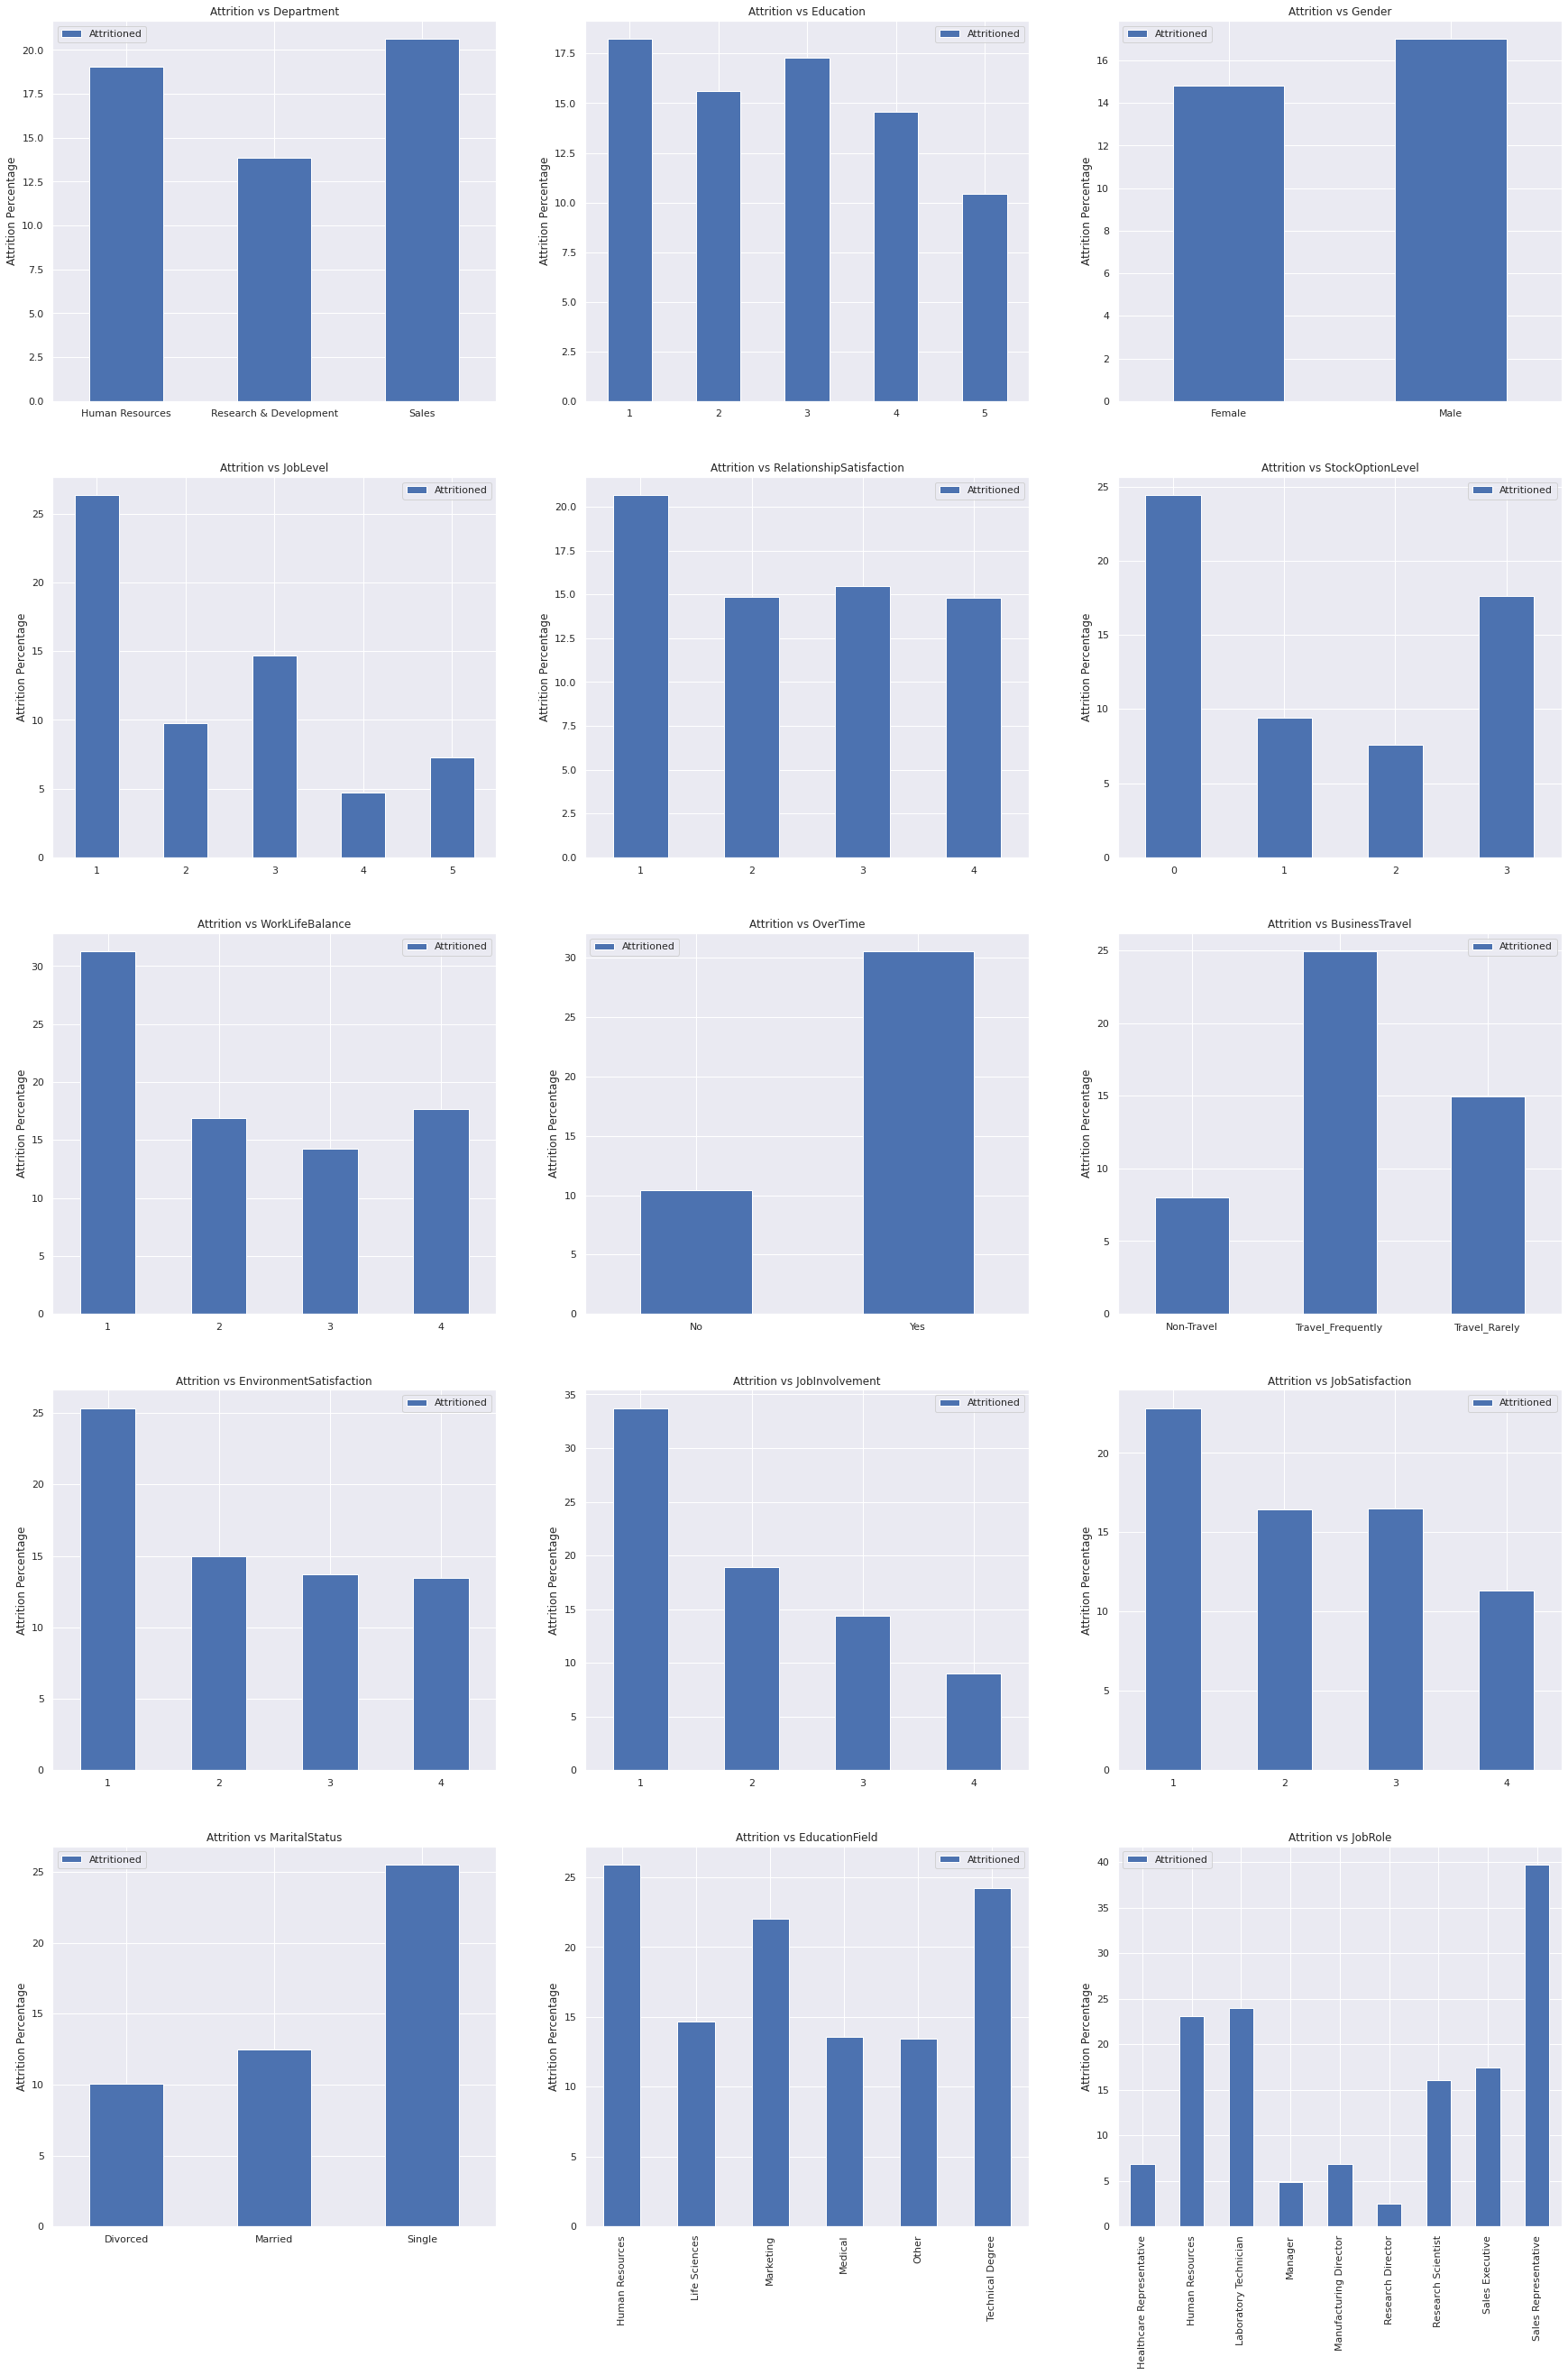

In [ ]:
listofvar = ["Department", "Education", "Gender", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance" , "OverTime", "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole"]
f,axes = plt.subplots(5,3,figsize=(30,45))
count = 0

for i in listofvar:
  comparing = i

  index = data[comparing].unique()
  attritioned = data.loc[(data["Attrition"] == "Yes")]
  not_attritioned = data.loc[(data["Attrition"] == "No")]
  percentAttrition, percentNotAttrition = [], []

  for i in index:
      attritioned_number = len(attritioned[attritioned[comparing] == i])
      not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
      total = attritioned_number + not_attritioned_number
      percentAttrition.append(attritioned_number/total * 100)
      percentNotAttrition.append(not_attritioned_number/total * 100)

  newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
  if comparing in ["EducationField", "JobRole"]:
    ax = newdata.plot.bar(ax = axes[count//3][count%3])
  else:
    ax = newdata.plot.bar(rot = 0, ax = axes[count//3][count%3])
  ax.set_title("Attrition vs " + comparing)
  ax.set_ylabel("Attrition Percentage")
  count += 1

The other variables are quite ambiguous and does not seem to suggest so. The last 7 categorical variables "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole" seems to suggest a linear trend with every different categorical value.

### Numeric variables comparison code

In [ ]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[['YearsAtCompany','TotalWorkingYears','DailyRate','HourlyRate','MonthlyIncome',"MonthlyRate"]]
crucial_data

,YearsAtCompany,TotalWorkingYears,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
0,6,8,1102,94,5993,19479
2,0,7,1373,92,2090,2396
14,4,6,103,50,2028,12947
21,5,10,1218,82,3407,6986
24,4,8,699,83,2960,17102
...,...,...,...,...,...,...
1438,1,1,638,33,1790,26956
1442,2,4,1092,36,4787,26124
1444,10,14,310,72,2339,3666
1452,6,12,878,94,6728,14255


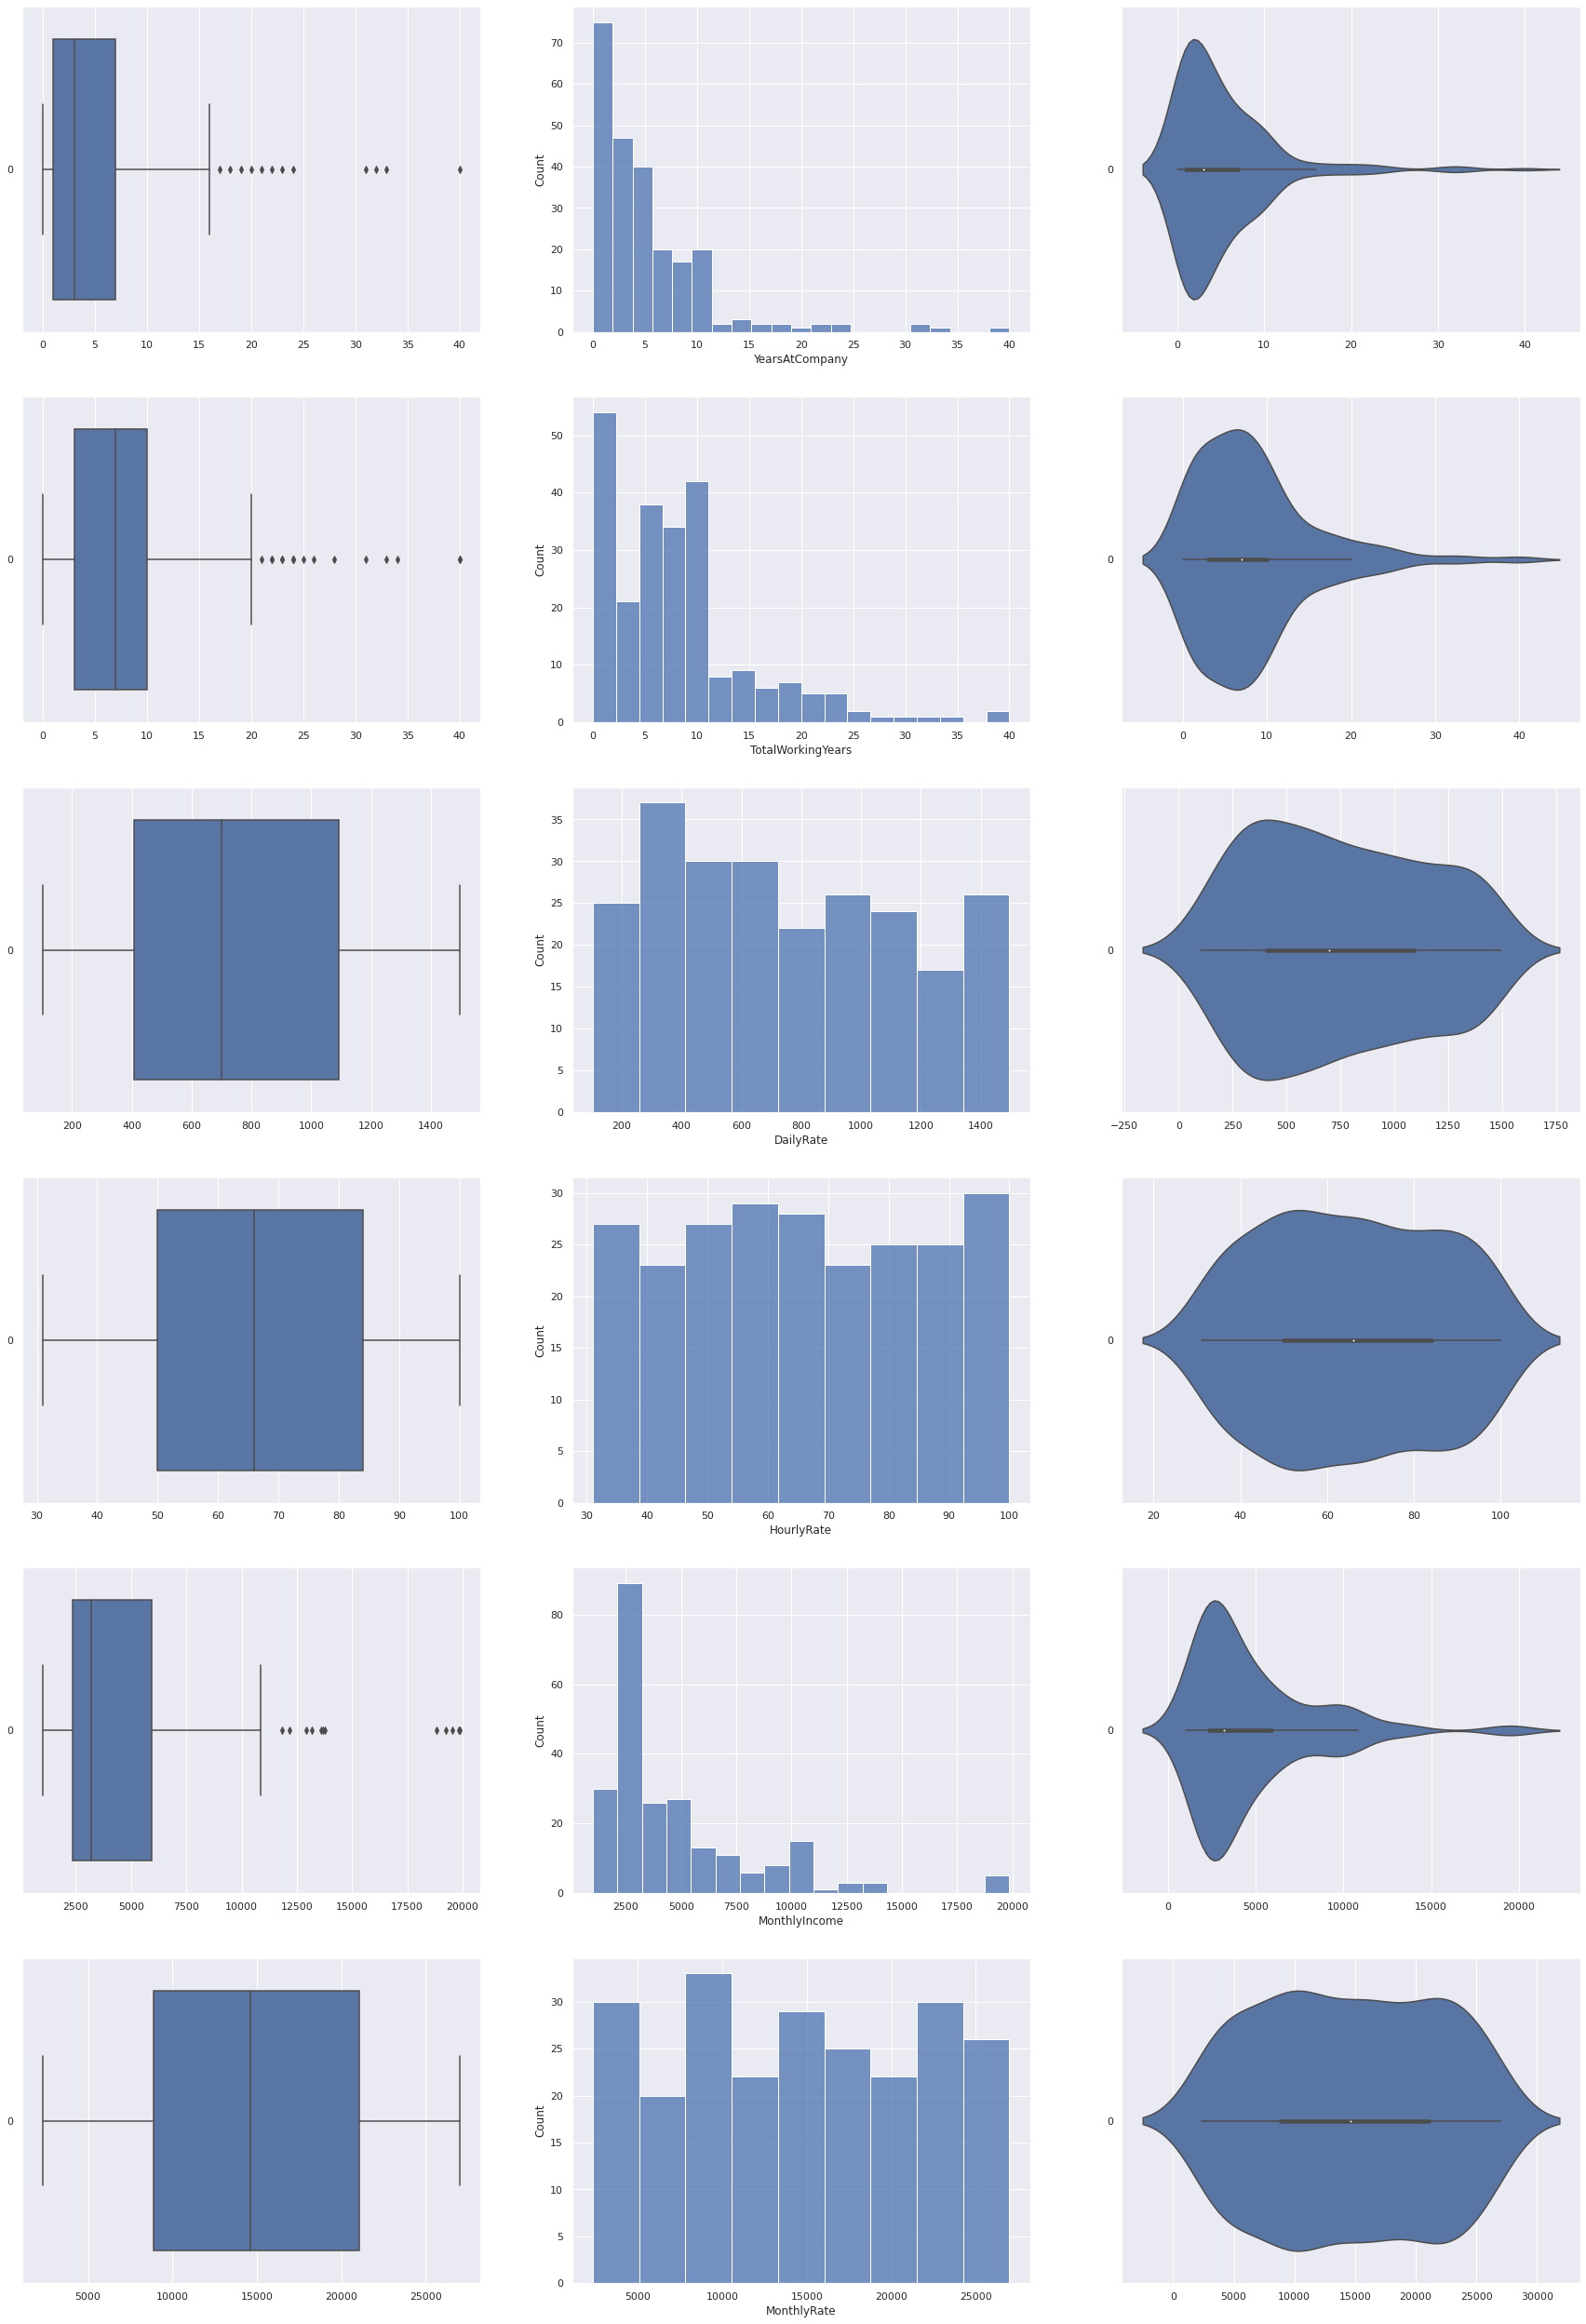

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(30, 45))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1

## **Data Cleaning**

Drop variables that do not have any meaning to attrition (EmployeeCount, EmployeeNumber, Over18, StandardHours)

In [ ]:
data = data.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])

Drop Data based on bar charts that shows which variables should not be used based on **categorical** data exploratory analysis

In [ ]:
data = data.drop(columns=["Department", "Education", "Gender", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"])

Drop Data based on bar charts that shows which variables should not be used based on **numerical** data exploratory analysis

In [ ]:
rates = data[["DailyRate", "HourlyRate", "MonthlyRate"]]

data = data.drop(columns=["DailyRate", "HourlyRate", "MonthlyRate"])

In [ ]:
rates

,DailyRate,HourlyRate,MonthlyRate
0,1102,94,19479
1,279,61,24907
2,1373,92,2396
3,1392,56,23159
4,591,40,16632
...,...,...,...
1465,884,41,12290
1466,613,42,21457
1467,155,87,5174
1468,1023,63,13243


###Chi-Square code

In [ ]:
from scipy.stats import chi2_contingency
from statistics import stdev

total_cols = data.columns.tolist() 
total_cols.remove("Attrition")

chi_stat=[]
p_val=[]

for i in total_cols:
    #Generation of our contingency table (or frequency table). With x axis as attrition and y axis as each of our data columns
    observed=pd.crosstab(index=data["Attrition"], columns=data[i])
    chi2, p, dof, ex=chi2_contingency(observed)
    chi_stat.append(chi2)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and", i ,"are independent variables. p-value =",p )
        print("\n")

chi2 = pd.DataFrame()
chi2["Variable"] = total_cols
chi2["Chi_Statistic"] = chi_stat
chi2["P_value"] = p_val


chi2=chi2[chi2.P_value<0.05]
chi2 = chi2.sort_values("P_value", ascending=True)
display(chi2)

Attrition and DistanceFromHome are independent variables. p-value = 0.09525313501707136


Attrition and MonthlyIncome are independent variables. p-value = 0.7085811366458111


Attrition and PercentSalaryHike are independent variables. p-value = 0.49895522292726846


Attrition and PerformanceRating are independent variables. p-value = 0.9900745465934576


Attrition and YearsSinceLastPromotion are independent variables. p-value = 0.11193387671448679




,Variable,Chi_Statistic,P_value
11,OverTime,87.564294,8.158424e-21
6,JobRole,86.190254,2.752482e-15
8,MaritalStatus,46.163677,9.455511e-11
14,TotalWorkingYears,122.302243,1.586242e-10
0,Age,119.174949,2.575853e-09
19,YearsWithCurrManager,74.617184,3.408337e-09
16,YearsAtCompany,95.388755,2.842980e-07
17,YearsInCurrentRole,64.300944,4.056019e-07
5,JobInvolvement,28.492021,2.863181e-06
1,BusinessTravel,24.182414,5.608614e-06


Drop values that are independent as per the chi-square test

In [ ]:
monthlyincome = data["MonthlyIncome"]
data = data.drop(columns=["DistanceFromHome", "MonthlyIncome", "PercentSalaryHike", "PerformanceRating", "YearsSinceLastPromotion"])
data

,Age,Attrition,BusinessTravel,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Life Sciences,2,3,Sales Executive,4,Single,8,Yes,8,0,6,4,5
1,49,No,Travel_Frequently,Life Sciences,3,2,Research Scientist,2,Married,1,No,10,3,10,7,7
2,37,Yes,Travel_Rarely,Other,4,2,Laboratory Technician,3,Single,6,Yes,7,3,0,0,0
3,33,No,Travel_Frequently,Life Sciences,4,3,Research Scientist,3,Married,1,Yes,8,3,8,7,0
4,27,No,Travel_Rarely,Medical,1,3,Laboratory Technician,2,Married,9,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Medical,3,4,Laboratory Technician,4,Married,4,No,17,3,5,2,3
1466,39,No,Travel_Rarely,Medical,4,2,Healthcare Representative,1,Married,4,No,9,5,7,7,7
1467,27,No,Travel_Rarely,Life Sciences,2,4,Manufacturing Director,2,Married,1,Yes,6,0,6,2,3
1468,49,No,Travel_Frequently,Medical,4,2,Sales Executive,2,Married,2,No,17,3,9,6,8


### Encode Categorical variables to fit into forest

In [ ]:
#Label Encoding (turning categorical to numerical)
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
norm_df=data.copy()

# Converting cols to category
for i in data[cat_cols]:
    if (i=='Attrition' or i == "OverTime" or i == "JobRole" or i == "MaritalStatus" or i == "JobInvolvement" or i == "BusinessTravel" or i == "EnvironmentalSatisfaction" or i == "EducationField"):
        data[i] = pd.Categorical(data[i])
        data[i] = data[i].cat.codes

In [ ]:
data

,Age,Attrition,BusinessTravel,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1,2,2,7,4,2,8,1,8,0,6,4,5
1,49,0,1,1,3,1,6,2,1,1,0,10,3,10,7,7
2,37,1,2,4,4,1,2,3,2,6,1,7,3,0,0,0
3,33,0,1,1,4,2,6,3,1,1,1,8,3,8,7,0
4,27,0,2,3,1,2,2,2,1,9,0,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,3,3,3,2,4,1,4,0,17,3,5,2,3
1466,39,0,2,3,4,1,0,1,1,4,0,9,5,7,7,7
1467,27,0,2,1,2,3,4,2,1,1,1,6,0,6,2,3
1468,49,0,1,3,4,1,7,2,1,2,0,17,3,9,6,8


## **Prediction of variables (Forest)**

In [ ]:
rates

,DailyRate,HourlyRate,MonthlyRate
0,1102,94,19479
1,279,61,24907
2,1373,92,2396
3,1392,56,23159
4,591,40,16632
...,...,...,...
1465,884,41,12290
1466,613,42,21457
1467,155,87,5174
1468,1023,63,13243


### MonthlyRate

In [ ]:
train_Attrition, test_Attrition, train_rate, test_rate = train_test_split(data[['Attrition']], rates[['MonthlyRate']], test_size = 0.20)

print("Train Set :", train_Attrition.shape, train_rate.shape)
print("Test Set  :", test_Attrition.shape, test_rate.shape)

Train Set : (1176, 1) (1176, 1)
Test Set  : (294, 1) (294, 1)


In [ ]:
dectree = DecisionTreeClassifier(max_depth = 15)
dectree.fit(train_rate,train_Attrition)

DecisionTreeClassifier(max_depth=15)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8784013605442177

Training Data
TPR Train :	 0.25906735751295334
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.7409326424870466




Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8197278911564626

TPR Train :	 0.045454545454545456
TNR Train :	 0.956

FPR Train :	 0.044
FNR Train :	 0.9545454545454546


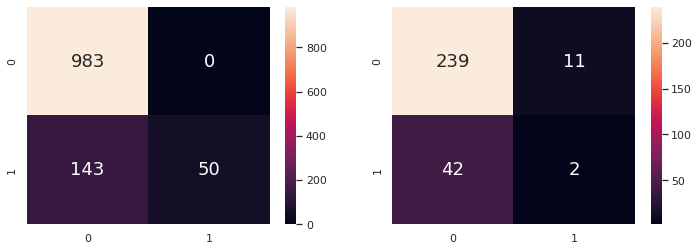

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict central values corresponding to price
attrition_train_pred = dectree.predict(train_rate)
attrition_test_pred = dectree.predict(test_rate)


# Print the Classification Accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_rate,train_Attrition))
print()

print("Training Data")
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(train_Attrition, attrition_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(train_Attrition, attrition_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_Attrition, attrition_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])



print("\n\n\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(test_rate,test_Attrition))
print()
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(test_Attrition, attrition_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
sb.heatmap(confusion_matrix(test_Attrition, attrition_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

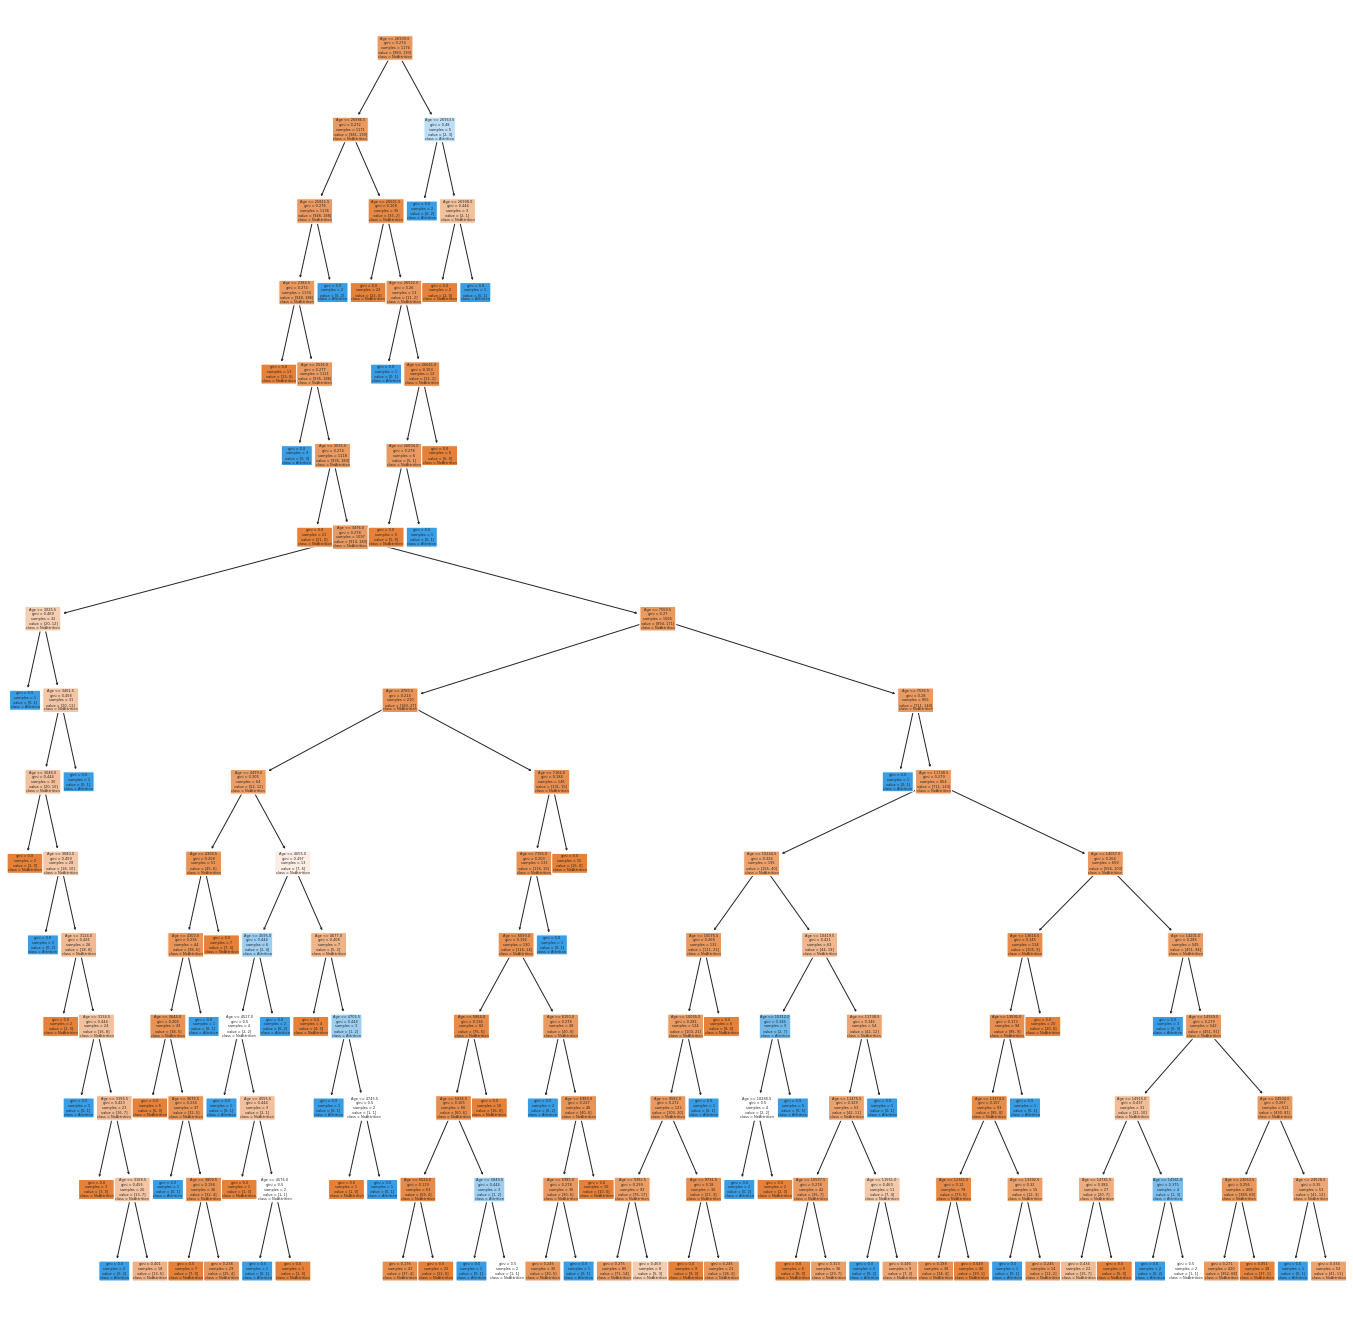

In [ ]:
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Age"], 
          class_names=["NoAttrition","Attrition"])
plt.savefig('out.pdf')

### Random Forest Classifier

In [ ]:
attritioned = data["Attrition"]
data = data.drop(columns=["Attrition"])
data

,Age,BusinessTravel,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,2,1,2,2,7,4,2,8,1,8,0,6,4,5
1,49,1,1,3,1,6,2,1,1,0,10,3,10,7,7
2,37,2,4,4,1,2,3,2,6,1,7,3,0,0,0
3,33,1,1,4,2,6,3,1,1,1,8,3,8,7,0
4,27,2,3,1,2,2,2,1,9,0,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,3,3,3,2,4,1,4,0,17,3,5,2,3
1466,39,2,3,4,1,0,1,1,4,0,9,5,7,7,7
1467,27,2,1,2,3,4,2,1,1,1,6,0,6,2,3
1468,49,1,3,4,1,7,2,1,2,0,17,3,9,6,8


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=7)

x_train, x_test, y_train, y_test = train_test_split(data, attritioned, test_size = 0.20)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)

Train Set : (1176, 15) (1176,)
Test Set  : (294, 15) (294,)


RandomForestClassifier(max_depth=7)

Train Data
Accuracy  :	 0.9039115646258503

TPR Train :	 0.4205128205128205
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.5794871794871795


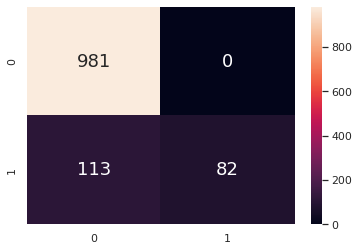

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = clf.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", clf.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8707482993197279

TPR Train :	 0.21428571428571427
TNR Train :	 0.9801587301587301

FPR Train :	 0.01984126984126984
FNR Train :	 0.7857142857142857


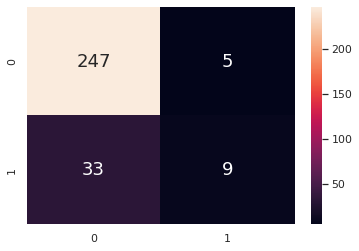

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", clf.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})